Лабораторная работа
=====================

Цель лабораторной работы получить практические знания по работе с признаками на известном датасете статистики самоубийств.

Вам необходимо будет подготовить данные для обучения линейной модели предсказания количества самоубийств (столбец - suicides/100k pop).

Чек-лист:
0. Изучите файл annotation.txt. Там содержится информация о датасете.
1. Загрузите датасет data.csv.
2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
7. Разделите выборку на обучаемую и тестовую.
8. Обучите линейную модель. Напишите в markdown свои наблюдения по полученным результатам.

Если возникнут затруднения, то смотрите на материал практических занятий. Данного там должно хватить для выполнения всех пунктов. Желаю успеха!

In [2]:
# 1.           Загрузить исходные данные data.csv
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

data = pd.read_csv('../data.csv')
data.head(5)

,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


### Content
This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

### References
United Nations Development Program. (2018). Human development index (HDI). Retrieved from http://hdr.undp.org/en/indicators/137506

World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. Retrieved from http://databank.worldbank.org/data/source/world-development-indicators#

[Szamil]. (2017). Suicide in the Twenty-First Century [dataset]. Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook

World Health Organization. (2018). Suicide prevention. Retrieved from http://www.who.int/mental_health/suicide-prevention/en/

### Inspiration
Suicide Prevention.

In [2]:
# 2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.


In [3]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
suicides_no,27820.0,2.425744e+02,9.020479e+02,0.000,3.000,25.000,131.000,2.233800e+04
population,27820.0,1.844794e+06,3.911779e+06,278.000,97498.500,430150.000,1486143.250,4.380521e+07
suicides/100k pop,27820.0,1.281610e+01,1.896151e+01,0.000,0.920,5.990,16.620,2.249700e+02
HDI for year,8364.0,7.766011e-01,9.336671e-02,0.483,0.713,0.779,0.855,9.440000e-01
gdp_per_capita ($),27820.0,1.686646e+04,1.888758e+04,251.000,3447.000,9372.000,24874.000,1.263520e+05


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 2.1+ MB


In [5]:
data.isnull().sum()

sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [6]:
# 3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
# ['HDI for year'] - Индикатор развития человеческого капитала. Связан сильно с ['gdp_per_capita ($)']. 
# Можно попробовать построить RandomForestRegressor для заполнения пробелов (восстановить данные по другим 
# существующим полям),
# но модель и так получит эти данные из других показателей. Поэтому просто удалю столбец ['HDI for year']
data.corr().round(2)

,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
suicides_no,1.00,0.62,0.31,0.15,0.06
population,0.62,1.00,0.01,0.10,0.08
suicides/100k pop,0.31,0.01,1.00,0.07,0.00
HDI for year,0.15,0.10,0.07,1.00,0.77
gdp_per_capita ($),0.06,0.08,0.00,0.77,1.00


In [4]:
!pip install pandas_profiling

     |████████████████████████████████| 258 kB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 2.6 MB/s eta 0:00:011
     |████████████████████████████████| 11.6 MB 335 kB/s eta 0:00:01
     |████████████████████████████████| 283 kB 12.2 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 27.4 MB/s eta 0:00:01
     |████████████████████████████████| 69 kB 8.2 MB/s  eta 0:00:01
     |████████████████████████████████| 64 kB 3.8 MB/s  eta 0:00:01
     |████████████████████████████████| 599 kB 43.5 MB/s eta 0:00:01
     |████████████████████████████████| 61 kB 500 kB/s  eta 0:00:01
     |████████████████████████████████| 156 kB 27.5 MB/s eta 0:00:01
     |████████████████████████████████| 291 kB 40.7 MB/s eta 0:00:01
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27084 sha256=058c1a7ab4e80ccdf281959845db9c88fafdc0cacfbffb676119bb276bc5c89a
  Stored in directory: /home/david/.cache/pip/wheels/70/e1/52/5b14d250ba868768823940c3229e995

In [5]:
# Покажу ProfileReport до удаления столбца, чтобы управление показателями было последовательным
import pandas as pd
import numpy as np
import pandas_profiling
from pandas_profiling import ProfileReport
pandas_profiling.ProfileReport(data)

ImportError: cannot import name '_check_savefig_extra_args' from 'matplotlib.backend_bases' (/home/david/anaconda3/lib/python3.7/site-packages/matplotlib/backend_bases.py)

In [8]:

del data['HDI_for_year']
data.head()


,sex,age,suicides_no,population,suicides/100k_pop,country-year,_gdp_for_year_($)_,gdp_per_capita_($),generation
0,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


In [9]:
# 4. Оцените зависимости переменных между собой. Используйте корреляции. 
# Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
#Create profileReport
import pandas as pd
import numpy as np
import pandas_profiling
from pandas_profiling import ProfileReport
pandas_profiling.ProfileReport(data)


In [10]:
# 5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).

# Мы используем модели SK-learn, если просто использовать LabelEncoder, то модели sklearn сделаны таким образом, 
# что учтут закономерности между случайным образом размеченные label's. Поэтому у нас 1 вариант OneHotEncoder ()
# Чтобы не связываться с массивами, сделаю аналог в Pandas - get_dummy()
data = pd.get_dummies(data=data, columns=['sex', 'age', 'generation'])
data.head()

,suicides_no,population,suicides/100k_pop,country-year,_gdp_for_year_($)_,gdp_per_capita_($),sex_female,sex_male,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,21,312900,6.71,Albania1987,"2,156,624,900",796,0,1,1,0,0,0,0,0,0,0,1,0,0,0
1,16,308000,5.19,Albania1987,"2,156,624,900",796,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,14,289700,4.83,Albania1987,"2,156,624,900",796,1,0,1,0,0,0,0,0,0,0,1,0,0,0
3,1,21800,4.59,Albania1987,"2,156,624,900",796,0,1,0,0,0,0,0,1,0,1,0,0,0,0
4,9,274300,3.28,Albania1987,"2,156,624,900",796,0,1,0,1,0,0,0,0,1,0,0,0,0,0


In [11]:
# 6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. 
# Удалите лишние, при необходимости.
# Поле ['HDI for year'] удалил на 3 пункте задания
# С полями ['Country_year'] - разделим его на 2 поля ['Country'] и ['Year']

data['year'] = data['country-year'].str.extract('(\d+)').astype(int)
data['country'] = data['country-year'].str.replace('\d+', '')
del data['country-year']

# Категориальную переменную country переведем в OneHotEncoder
data = pd.get_dummies(data=data, columns=['country'])
data.head()


,suicides_no,population,suicides/100k_pop,_gdp_for_year_($)_,gdp_per_capita_($),sex_female,sex_male,age_15-24 years,age_25-34 years,age_35-54 years,...,country_Thailand,country_Trinidad and Tobago,country_Turkey,country_Turkmenistan,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan
0,21,312900,6.71,"2,156,624,900",796,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,308000,5.19,"2,156,624,900",796,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,14,289700,4.83,"2,156,624,900",796,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,21800,4.59,"2,156,624,900",796,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,274300,3.28,"2,156,624,900",796,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Поле ['gdp_for_year ($)'] содержит ",", которые не воспринимаются моделью как числа, а воспринимаются как объекты.
# Удалим запятые, преобразуем в float - потому что цифры большие, int может выдать ошибку
# Что там за пробелы в названии столбца?))
data.rename({' gdp_for_year ($) ' : 'gdp_for_year ($)'}, axis=1, inplace=True)
data.head()

,suicides_no,population,suicides/100k_pop,_gdp_for_year_($)_,gdp_per_capita_($),sex_female,sex_male,age_15-24 years,age_25-34 years,age_35-54 years,...,country_Thailand,country_Trinidad and Tobago,country_Turkey,country_Turkmenistan,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan
0,21,312900,6.71,2.156625e+09,796,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,16,308000,5.19,2.156625e+09,796,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,14,289700,4.83,2.156625e+09,796,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,21800,4.59,2.156625e+09,796,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,274300,3.28,2.156625e+09,796,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
list(data.columns) 
# df = data.astype(bool).sum(axis=0)
# df

['suicides_no',
 'population',
 'suicides/100k_pop',
 '_gdp_for_year_($)_',
 'gdp_per_capita_($)',
 'sex_female',
 'sex_male',
 'age_15-24 years',
 'age_25-34 years',
 'age_35-54 years',
 'age_5-14 years',
 'age_55-74 years',
 'age_75+ years',
 'generation_Boomers',
 'generation_G.I. Generation',
 'generation_Generation X',
 'generation_Generation Z',
 'generation_Millenials',
 'generation_Silent',
 'year',
 'country_Albania',
 'country_Antigua and Barbuda',
 'country_Argentina',
 'country_Armenia',
 'country_Aruba',
 'country_Australia',
 'country_Austria',
 'country_Azerbaijan',
 'country_Bahamas',
 'country_Bahrain',
 'country_Barbados',
 'country_Belarus',
 'country_Belgium',
 'country_Belize',
 'country_Bosnia and Herzegovina',
 'country_Brazil',
 'country_Bulgaria',
 'country_Cabo Verde',
 'country_Canada',
 'country_Chile',
 'country_Colombia',
 'country_Costa Rica',
 'country_Croatia',
 'country_Cuba',
 'country_Cyprus',
 'country_Czech Republic',
 'country_Denmark',
 'country_

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Columns: 121 entries, suicides_no to country_Uzbekistan
dtypes: float64(2), int64(4), uint8(115)
memory usage: 4.3 MB


In [1]:
# 7. Разделите выборку на обучаемую и тестовую.
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = data.loc[:, data.columns != 'suicides/100k_pop']
y = data['suicides/100k_pop']

# Очень мелко разбил признаки. Получил ошибку
# "ValueError: The least populated class in y has only 1 member, which is too few.
# The minimum number of groups for any class cannot be less than 2."

# В интернете пишут
# This because of the nature of stratification. The stratify parameter set it to split 
# data in a way to allocate test_size amount of data to each class. 
# In this case, you don't have sufficient class labels of one of your classes to keep
# the data splitting ratio equal to test_size.

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)
# X.describe().transpose()
# pandas_profiling.ProfileReport(data)

NameError: name 'data' is not defined

In [16]:
# Эксперимент 1 - stratify убираю - сработало
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Вопрос к преподавателю: Как правильно делать?

In [17]:
# 8. Обучите линейную модель. Напишите в markdown свои наблюдения по полученным результатам.
from sklearn import  linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred_lr = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# Печатаем MAE
print("MAE: {:.2f}".format(mean_absolute_error(y_test, y_pred_lr)))

Coefficients: 
 [ 5.22501007e-03 -6.90803853e-07  4.41277815e-13 -1.22607631e-04
 -6.71198422e+00  6.71204151e+00 -3.69282000e+00 -6.17942492e-01
  1.77371645e+00 -1.19984907e+01  3.47384442e+00  1.10617028e+01
 -7.48905418e-01  4.78854630e-01 -2.86496350e-01  1.97910091e+00
 -1.18774891e-01 -1.30379113e+00 -4.34166418e-02 -1.04061955e+01
 -1.21368822e+01 -1.97953865e+00 -1.01125976e+01  1.15465221e+00
  2.94981326e+00  1.38915948e+01 -1.01467461e+01 -9.89489431e+00
 -9.79900381e+00 -8.78887599e+00  1.72192430e+01  1.12534772e+01
 -7.45540513e+00 -5.92137626e+00 -2.81374592e+00  5.31153830e+00
 -1.84790371e+00  2.09450678e+00 -2.06876002e+00 -7.19577317e+00
 -6.42579787e+00  1.08363889e+01  9.21499261e+00 -6.53462208e+00
  5.96466189e+00  6.80262199e+00 -1.54830854e+01 -6.84597952e+00
 -2.92663239e+00  1.42095603e+01 -7.01347882e+00  1.40295319e+01
  1.02526548e+01 -9.64699226e+00  4.21409105e+00 -7.31457861e+00
 -1.07969555e+01 -1.01294767e+01  8.85090103e+00  1.91364681e+01
  3.49023

In [18]:
# Контроль качества линейной модели. Посмотрим какое MAE можно получить на RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=50, random_state=2)
forest.fit(X_train, y_train)
y_pred_rfr = forest.predict(X_test)

# Печатаем MAE
print("MAE: {:.2f}".format(mean_absolute_error(y_test, y_pred_rfr)))
# print("Правильность на тестовом наборе: {:.3f}".format(forest.score(X_test, y_test)))

# Видно, что RFR на много лучше справляется с задачей

MAE: 0.34


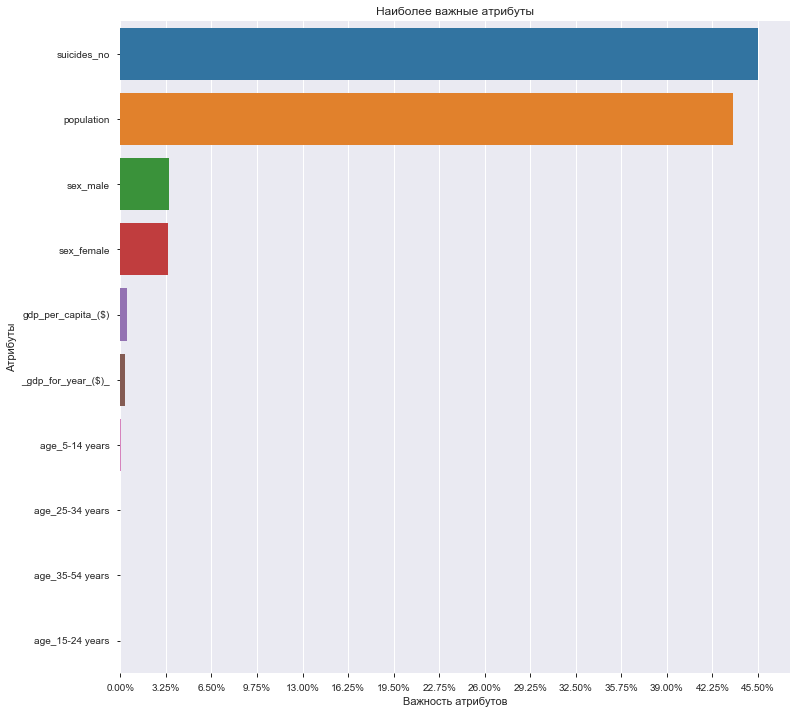

,0
suicides_no,0.455025
population,0.437245
sex_male,0.034427
sex_female,0.033962
gdp_per_capita_($),0.004685
_gdp_for_year_($)_,0.003334
age_5-14 years,0.000654
age_25-34 years,0.000109
age_35-54 years,0.000096
age_15-24 years,0.000075


In [24]:
headers = list(X_train.columns.values)
# Значимость признаков
feature_imp = pd.Series(forest.feature_importances_[:10],index=headers[:10]).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(12, 12))
sns.barplot(x=feature_imp, y=feature_imp.index)

x_ticks = np.linspace(start = 0, stop=max(feature_imp), num =  15, endpoint = True)
plt.xticks(x_ticks, [f"{x:0.2%}" for x in x_ticks])
plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
# На графике
plt.show()
# В DataFrame
pd.DataFrame(feature_imp)

In [25]:
# Добавим MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

# масштабируем данные с помощью MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr = LinearRegression().fit(X_train_scaled, y_train)
y_pred_lr_MinMax = lr.predict(X_test_scaled)
# print("lr.coef_: {}".format(lr.coef_))
# print("lr.intercept_: {}".format(lr.intercept_))

# Печатаем MAE
print("MAE: {:.2f}".format(mean_absolute_error(y_test, y_pred_lr_MinMax)))

# Вывод: MinMaxScaler не дал результата. Результат тот же, что и у простой Линейной регрессии

MAE: 8.39


In [26]:
# используем RandomForestRegressor (чтобы определить наиболее значимые признаки)
# и SelectPercentile, чтобы выбрать 50% признаков
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel


select = RFE(RandomForestRegressor(n_estimators=50, random_state=2, n_jobs = -1), n_features_to_select=60)
select.fit(X_train, y_train) 
mask = select.get_support()
print('Выбранные переменные:')
print(mask)
X_train_rfe= select.transform(X_train)
X_test_rfe= select.transform(X_test)
lr_rfr = LinearRegression(n_jobs = -1).fit(X_train_rfe, y_train)
# .score(X_test_rfe, y_test)
# print("Правильность на тестовом наборе: {:.3f}".format(score))
y_pred_lr_rfr = lr_rfr.predict(X_test_rfe)

# Печатаем MAE
print("MAE: {:.2f}".format(mean_absolute_error(y_test, y_pred_lr_rfr)))

#Вывод: Модель работает в разы дольше предыдущих. Идет перебор
#     

Выбранные переменные:
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True False False False False  True
 False  True False False False False  True  True  True False  True  True
 False  True False False False  True  True False  True False False False
 False  True False  True  True False  True False False False  True  True
 False False False  True False  True  True False False False  True  True
  True False False False False False False  True False False False False
 False False False False False  True  True False  True  True  True False
  True  True False False False  True False  True False  True  True  True
 False False  True  True False False  True False  True  True  True False]
MAE: 8.74


In [ ]:
# # Запустим цикл по нахождению оптимального количества полей для линейной модели. Ответ 90 полей

# lst_of_parameters = [10, 20,30,40,50,60,70,80,90,100,110,120]

# for i in lst_of_parameters:
#     select = RFE(RandomForestRegressor(n_estimators=50, random_state=2, n_jobs = -1), n_features_to_select=i)
#     select.fit(X_train, y_train) 
#     mask = select.get_support()
#     X_train_rfe= select.transform(X_train)
#     X_test_rfe= select.transform(X_test)
#     lr_rfr = LinearRegression(n_jobs = -1).fit(X_train_rfe, y_train)
#     y_pred_lr_rfr = lr_rfr.predict(X_test_rfe)   
#     print(f'Количество отобранных полей модели:{i}; МАЕ: {mean_absolute_error(y_test, y_pred_lr_rfr)}')
    
# # Вывод: При 90 полях Линейная регрессия выдает самое маленькое МАЕ, дальше идет ухудшение модели
# # Вывод по линейной модели - она не оптимальна для данной модели. Намного хуже RandomForestRegressor